In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('df.csv')


#################14th august tunshi clear day#################
df_3km = pd.read_csv('test_3km.csv')
df_9km = pd.read_csv('test_9km.csv')
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
y_tkm = np.repeat(x, 180)
y_nkm = np.repeat(x, 60)
df_y_tkm = pd.DataFrame(y_tkm,columns=['time'])
df_y_nkm = pd.DataFrame(y_nkm,columns=['time'])
tkm = pd.concat([df_y_tkm,df_3km], axis=1)
nkm = pd.concat([df_y_nkm,df_9km], axis=1)
test3km = tkm.groupby(['time']).mean()
test9km = nkm.groupby(['time']).mean()
test_concat = pd.concat([test3km,test9km], axis=1)
df_tunshi_aug14= pd.DataFrame(df.iloc[1776:1799,15:18].reset_index(drop=True))
#df_ground_aug14= pd.DataFrame(df.loc[1776:1799,'ground_tunshi'].reset_index(drop=True))
df_all = pd.concat([test3km,test9km,df_tunshi_aug14], axis=1)

df_all.reset_index(inplace=True)
df_all['time']= df_all['index']
del df_all['index']
df_all.head()

,GHI_no_aer_3km_rrtmg,GHI_aerP4_3km_rrtmg,GHI_aerP4_3km_dhudia,GHI_aerP4_3km_goddard_old,GHI_aerP4_3km_goddard_new,GHI_aerP4_rrtmg_aer_opt4,GHI_no_aer_9km_rrtmg,GHI_aerP4_9km_rrtmg,GHI_aerP4_9km_dhudia,GHI_aerP4_9km_goddard_old,GHI_aerP4_9km_goddard_new,GHI_aerP4_9km_rrtmg_aer_opt4,ineichen_min_tunshi,ground_tunshi,wrf_tunshi,time
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [8]:
df_3km.shape

(4320, 6)

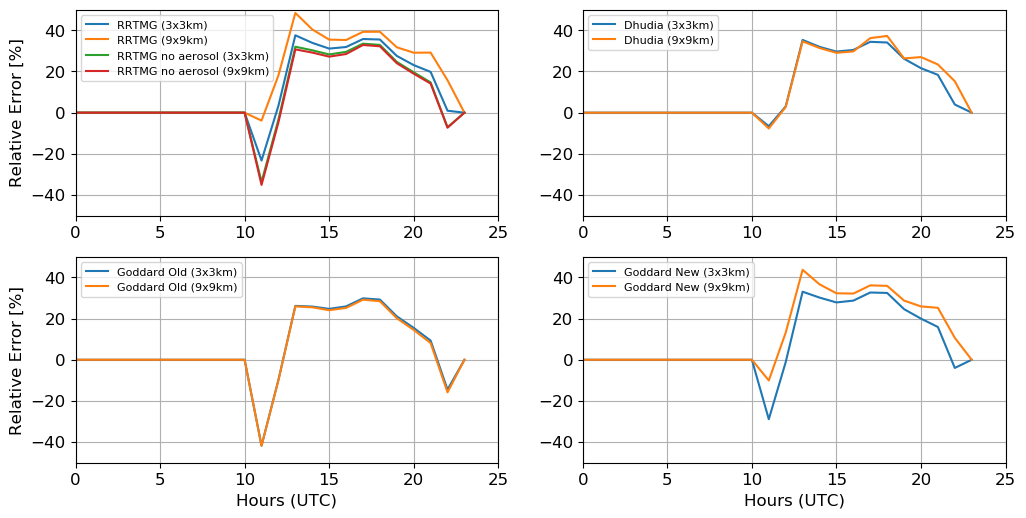

In [4]:
def RE_parcent(obs,model):
    RE = ((obs-model)*100)/model
    return RE
rrtmg_3 = RE_parcent(df_all.ground_tunshi,df_all.GHI_aerP4_3km_rrtmg)
rrtmg_3=np.nan_to_num(rrtmg_3)

rrtmg_3_no = RE_parcent(df_all.ground_tunshi,df_all.GHI_no_aer_3km_rrtmg)
rrtmg_3_no=np.nan_to_num(rrtmg_3_no)

rrtmg_9_no = RE_parcent(df_all.ground_tunshi,df_all.GHI_no_aer_9km_rrtmg)
rrtmg_9_no=np.nan_to_num(rrtmg_9_no)

rrtmg_9 = RE_parcent(df_all.ground_tunshi,df_all.GHI_aerP4_9km_rrtmg)
rrtmg_9=np.nan_to_num(rrtmg_9)

dhudia_3 = RE_parcent(df_all.ground_tunshi,df_all.GHI_aerP4_3km_dhudia)
dhudia_3=np.nan_to_num(dhudia_3)
dhudia_9 = RE_parcent(df_all.ground_tunshi,df_all.GHI_aerP4_9km_dhudia)
dhudia_9=np.nan_to_num(dhudia_9)
goddard_old_3 = RE_parcent(df_all.ground_tunshi,df_all.GHI_aerP4_3km_goddard_old)
goddard_old_3=np.nan_to_num(goddard_old_3)
goddard_old_9 = RE_parcent(df_all.ground_tunshi,df_all.GHI_aerP4_9km_goddard_old)
goddard_old_9=np.nan_to_num(goddard_old_9)
goddard_new_3 = RE_parcent(df_all.ground_tunshi,df_all.GHI_aerP4_3km_goddard_new)
goddard_new_3=np.nan_to_num(goddard_new_3)
goddard_new_9 = RE_parcent(df_all.ground_tunshi,df_all.GHI_aerP4_9km_goddard_new)
goddard_new_9=np.nan_to_num(goddard_new_9)

plt.figure(figsize=(12,6),dpi=100)
plt.subplot(221)
plt.plot(rrtmg_3,label='RRTMG (3x3km)')
plt.plot(rrtmg_9,label='RRTMG (9x9km)')
plt.plot(rrtmg_3_no,label='RRTMG no aerosol (3x3km)')
plt.plot(rrtmg_9_no,label='RRTMG no aerosol (9x9km)')
plt.legend(fontsize=8,loc='upper left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.xlim(0,25)
plt.ylim(-50,50)
plt.ylabel('Relative Error [%]',fontsize=12)
plt.subplot(222)
plt.plot(dhudia_3,label='Dhudia (3x3km)')
plt.plot(dhudia_9,label='Dhudia (9x9km)')
plt.legend(fontsize=8,loc='upper left')
plt.xlim(0,25)
plt.ylim(-50,50)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.subplot(223)
plt.plot(goddard_old_3,label='Goddard Old (3x3km)')
plt.plot(goddard_old_9,label='Goddard Old (9x9km)')
plt.legend(fontsize=8,loc='upper left')
plt.xlabel('Hours (UTC)',fontsize=12)
plt.xlim(0,25)
plt.ylim(-50,50)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative Error [%]',fontsize=12)
plt.grid()
plt.subplot(224)
plt.plot(goddard_new_3,label='Goddard New (3x3km)')
plt.plot(goddard_new_9,label='Goddard New (9x9km)')
plt.xlabel('Hours (UTC)',fontsize=12)
plt.xlim(0,25)
plt.ylim(-50,50)
plt.legend(fontsize=8,loc='upper left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

In [32]:
a=np.nan_to_num(rrtmg_3)
a

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        , -23.23038939,
         3.37065191,  37.57699768,  33.91076218,  31.12038597,
        31.8852526 ,  35.7669044 ,  35.52732556,  27.57693627,
        23.10543873,  19.80633143,   0.94554135,   0.        ])

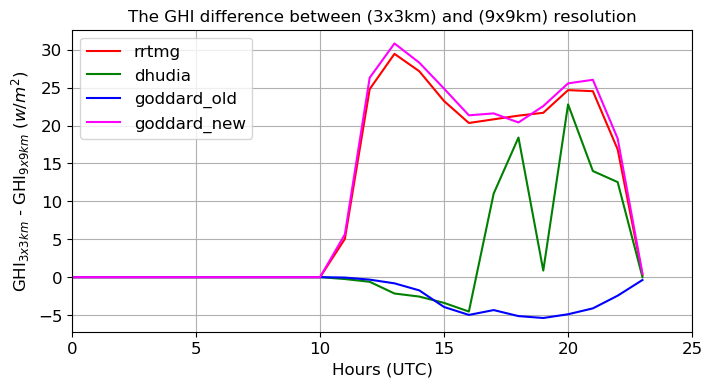

In [10]:
rrtmg=df_all.GHI_aerP4_3km_rrtmg-df_all.GHI_aerP4_9km_rrtmg
dhudia=df_all.GHI_aerP4_3km_dhudia-df_all.GHI_aerP4_9km_dhudia
goddard_old=df_all.GHI_aerP4_3km_goddard_old-df_all.GHI_aerP4_9km_goddard_old
goddard_new=df_all.GHI_aerP4_3km_goddard_new-df_all.GHI_aerP4_9km_goddard_new
plt.figure(figsize=(8,4),dpi=100)
plt.plot(rrtmg.index,rrtmg,'r',label='rrtmg')
plt.plot(dhudia.index,dhudia,'g',label='dhudia')
plt.plot(goddard_old.index,goddard_old,'b',label='goddard_old')
plt.plot(goddard_new.index,goddard_new,'magenta',label='goddard_new')
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0,25)
plt.title('The GHI difference between (3x3km) and (9x9km) resolution',fontsize=12)
plt.grid()
plt.ylabel('GHI$_{3x3km}$ - GHI$_{9x9km}$ ($w/m^2$)',fontsize=12)
plt.xlabel('Hours (UTC)',fontsize=12)
plt.show()

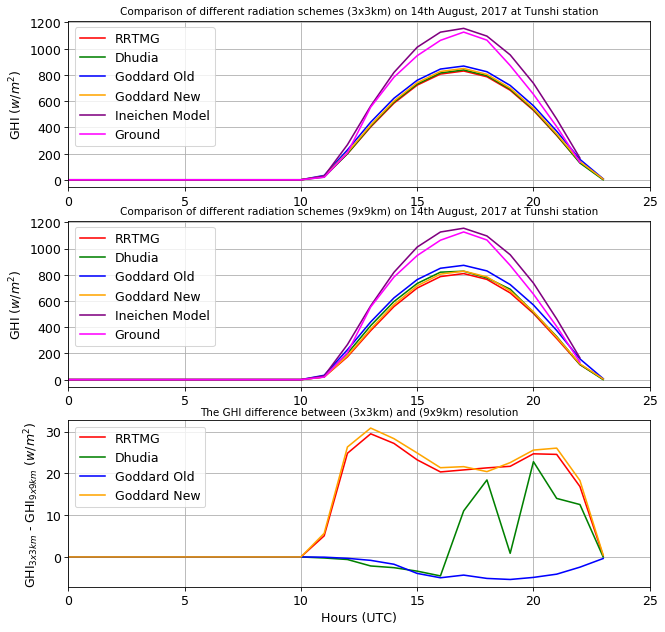

In [11]:
plt.figure(figsize=(10,10),dpi=75)
#plt.rcParams['axes.linewidth'] = 2 #set the value globally
plt.subplot(3,1,1)
#legend_properties = {'weight':'bold'}
plt.plot(df_all.time,df_all.GHI_aerP4_3km_rrtmg, 'r',label='RRTMG')
plt.plot(df_all.time,df_all.GHI_aerP4_3km_dhudia, 'g',label='Dhudia')
plt.plot(df_all.time,df_all.GHI_aerP4_3km_goddard_old, 'b',label='Goddard Old')
plt.plot(df_all.time,df_all.GHI_aerP4_3km_goddard_new, 'orange',label='Goddard New')
plt.plot(df_all.time,df_all.ineichen_min_tunshi, 'purple',label='Ineichen Model')
plt.plot(df_all.time,df_all.ground_tunshi, 'magenta',label='Ground')
plt.title('Comparison of different radiation schemes (3x3km) on 14th August, 2017 at Tunshi station',fontsize=10)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0,25)
plt.grid()
plt.ylabel('GHI ($w/m^2$)',fontsize=12)
plt.subplot(3,1,2)
# legend_properties = {'weight':'bold'}
plt.plot(df_all.time,df_all.GHI_aerP4_9km_rrtmg, 'r',label='RRTMG')
plt.plot(df_all.time,df_all.GHI_aerP4_9km_dhudia, 'g',label='Dhudia')
plt.plot(df_all.time,df_all.GHI_aerP4_9km_goddard_old, 'b',label='Goddard Old')
plt.plot(df_all.time,df_all.GHI_aerP4_9km_goddard_new, 'orange',label='Goddard New')
plt.plot(df_all.time,df_all.ineichen_min_tunshi, 'purple',label='Ineichen Model')
plt.plot(df_all.time,df_all.ground_tunshi, 'magenta',label='Ground')
plt.title('Comparison of different radiation schemes (9x9km) on 14th August, 2017 at Tunshi station',fontsize=10)
#plt.xlabel('Hours (UTC)',fontsize=12)
plt.ylabel('GHI ($w/m^2$)',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.xlim(0,25)
plt.grid()
plt.subplot(3,1,3)
plt.plot(rrtmg.index,rrtmg,'r',label='RRTMG')
plt.plot(dhudia.index,dhudia,'g',label='Dhudia')
plt.plot(goddard_old.index,goddard_old,'b',label='Goddard Old')
plt.plot(goddard_new.index,goddard_new,'orange',label='Goddard New')
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0,25)
plt.title('The GHI difference between (3x3km) and (9x9km) resolution',fontsize=10)
plt.grid()
plt.ylabel('GHI$_{3x3km}$ - GHI$_{9x9km}$ ($w/m^2$)',fontsize=12)
plt.xlabel('Hours (UTC)',fontsize=12)
plt.show()

In [48]:
df_all.head()

,GHI_no_aer_3km_rrtmg,GHI_aerP4_3km_rrtmg,GHI_aerP4_3km_dhudia,GHI_aerP4_3km_goddard_old,GHI_aerP4_3km_goddard_new,GHI_aerP4_rrtmg_aer_opt4,GHI_no_aer_9km_rrtmg,GHI_aerP4_9km_rrtmg,GHI_aerP4_9km_dhudia,GHI_aerP4_9km_goddard_old,GHI_aerP4_9km_goddard_new,GHI_aerP4_9km_rrtmg_aer_opt4,ineichen_min_tunshi,ground_tunshi,wrf_tunshi,time
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


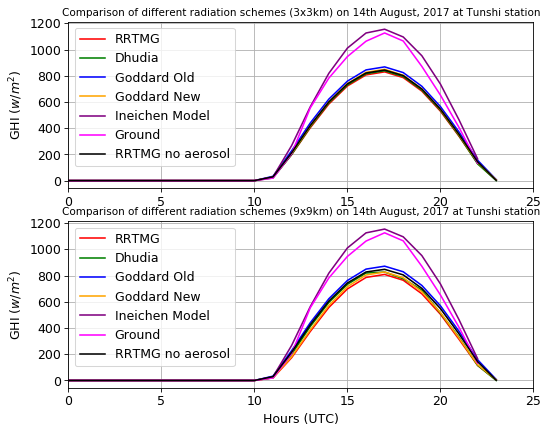

In [51]:
plt.figure(figsize=(8,10),dpi=75)
#plt.rcParams['axes.linewidth'] = 2 #set the value globally
plt.subplot(3,1,1)
#legend_properties = {'weight':'bold'}
plt.plot(df_all.time,df_all.GHI_aerP4_3km_rrtmg, 'r',label='RRTMG')
plt.plot(df_all.time,df_all.GHI_aerP4_3km_dhudia, 'g',label='Dhudia')
plt.plot(df_all.time,df_all.GHI_aerP4_3km_goddard_old, 'b',label='Goddard Old')
plt.plot(df_all.time,df_all.GHI_aerP4_3km_goddard_new, 'orange',label='Goddard New')
plt.plot(df_all.time,df_all.ineichen_min_tunshi, 'purple',label='Ineichen Model')
plt.plot(df_all.time,df_all.ground_tunshi, 'magenta',label='Ground')
plt.plot(df_all.time,df_all.GHI_no_aer_3km_rrtmg, 'k',label='RRTMG no aerosol')
plt.title('Comparison of different radiation schemes (3x3km) on 14th August, 2017 at Tunshi station',fontsize=10)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0,25)
plt.grid()
plt.ylabel('GHI ($w/m^2$)',fontsize=12)
plt.subplot(3,1,2)
# legend_properties = {'weight':'bold'}
plt.plot(df_all.time,df_all.GHI_aerP4_9km_rrtmg, 'r',label='RRTMG')
plt.plot(df_all.time,df_all.GHI_aerP4_9km_dhudia, 'g',label='Dhudia')
plt.plot(df_all.time,df_all.GHI_aerP4_9km_goddard_old, 'b',label='Goddard Old')
plt.plot(df_all.time,df_all.GHI_aerP4_9km_goddard_new, 'orange',label='Goddard New')
plt.plot(df_all.time,df_all.ineichen_min_tunshi, 'purple',label='Ineichen Model')
plt.plot(df_all.time,df_all.ground_tunshi, 'magenta',label='Ground')
plt.plot(df_all.time,df_all.GHI_no_aer_9km_rrtmg, 'k',label='RRTMG no aerosol')
plt.title('Comparison of different radiation schemes (9x9km) on 14th August, 2017 at Tunshi station',fontsize=10)
#plt.xlabel('Hours (UTC)',fontsize=12)
plt.ylabel('GHI ($w/m^2$)',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.xlim(0,25)
plt.grid()
#plt.subplot(3,1,3)
plt.xlabel('Hours (UTC)',fontsize=12)
plt.show()